# SIMULACIÓN | PROYECTO UNIDAD 1




## INSTRUCCIONES

- El objetivo del proyecto es poner en práctica los contenidos aprendidos en la primera unidad de Probabilidades, con el uso de un set de datos real extraidos de un medio libre. En algunos casos deberá investigar ciertos contenidos para apoyar sus conclusiones.  


- Se presentan las actividades a desarrollar, cada una de ella contiene un set de instrucciones, preguntas y su puntaje asociado. Las preguntas deben ser respondidas en celdas de texto (no se considera respuesta si está en un comentario entre las líneas de código)


- Al finalizar presente las conclusiones de su trabajo. 


- Debe subir a siveduc en la tarea Proyecto1, su notebook y el archivo de datos utilizado.


- El título del notebook debe ser: proyecto1_Apellido1_Apellido2_Apellido3


- Fecha límite de entrega: viernes 4 de octubre 23:59 horas.  


- Este trabajo pondera un 25% del total del curso 

**Integrantes:** 

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.dpi'] = 100

import seaborn as sns

from IPython.core.pylabtools import figsize

In [2]:
import random

## Parte I : Propiedades de las Probabilidades



A continuación se presenta la simulación de una población, representada por el dinero que dispone cada persona y sus transacciones económicas. 

1. (1 punto) Analice la simulación, realice las siguientes modificaciones en el proceso e interprete sus resultados:

    (a) Modifique la distribución inicial de dinero. ¿Cómo se comporta el coeficiente de Gini y la distribución de la riqueza?
    
    (b) Modifique la función de transacción para aumentar o disminuir el índice de Gini. 
    
    (c) Comente la simulación propuesta ¿Qué otros factores inciden en los resultados de la simulación?
    
    
2. (1 punto) Defina eventos de interés $A$, $B$ y $C$ y calcule las siguientes probabilidades mediante la simulación propuesta:

    (a) $P(A), P(B) y P(C)$ 
    
    (b) $P(A \cup B) $ 

    (c) $P(A \mid C)$
    
Ejemplos de eventos de interés (defina sus propios eventos):
- La mediana de la población es mayor o igual que $x$ pesos.
- El percentil 10% es mayor o igual que $y$ pesos
- El coeficiente de gini de la población es menor que $0.3$


#### Referencia:
https://nbviewer.jupyter.org/url/norvig.com/ipython/Economics.ipynb

**gini**: Definición de la métrica de equidad de gini 

**transaccion**: accion de intercambio de dinero, puede ser justa o injusta

**interaccion**: eleccion de los actores que realizan la transacción

**simula**: funcion de simulacion, dinerop: lista que representa la cantidad de dinero actual que tiene cada persona, T: cantidad de iteraciones 

In [3]:
def gini(y):
    "Calcula el coeficiente de Gini: una medida de la equidad/inequidad en la"
    "población y (representada por una lista que contabiliza el dinero actual de cada persona."
    y = sorted(y)
    n = len(y)
    numer = 2 * sum((i+1) * y[i] for i in range(n))
    denom = n * sum(y)
    return (numer / denom) - (n + 1) / n

def transaccion(A, B):
    "Reune el dinero de A y B en un pozo y luego lo distribuye aleatoriamente entre los dos actores."
    pozo = A + B
    parte1 = random.uniform(0,pozo)
    return parte1, pozo - parte1

def transaccion_triangular(A, B):
    "Reune el dinero de A y B en un pozo y luego lo distribuye aleatoriamente entre los dos actores."
    pozo = A + B
    parte1 = random.triangular(0,pozo)
    return parte1, pozo - parte1

def transaccion_injusta(A, B): return random.choice(([A + B, 0], [0, A + B]))

def interaccion(N): return random.sample(range(N), 2)

def percent(pct, items):
    "The item that is pct percent through the sorted list of items."
    return items[min(len(items)-1, len(items) * pct // 100)]



**SIMULACIÓN: modifíquela para realizar sus cálculos **

In [4]:
def simula_TGR(dinerop, T):
    "Ejecuta simulacion de dinerop para T transacciones; devuelve dinerop en cada paso." 
    dinerop = dinerop.copy()
    yield dinerop
    for t in range(1, T + 1):
        i, j = interaccion(len(dinerop))
        dinerop[i], dinerop[j] = transaccion_triangular(dinerop[i], dinerop[j]) 
        yield dinerop

def simula(dinerop, T):
    "Ejecuta simulacion de dinerop para T transacciones; devuelve dinerop en cada paso." 
    dinerop = dinerop.copy()
    yield dinerop
    for t in range(1, T + 1):
        i, j = interaccion(len(dinerop))
        dinerop[i], dinerop[j] = transaccion(dinerop[i], dinerop[j]) 
        yield dinerop

*** Ejemplo de la simulación con una poblacion, donde los cuatro actores inician con 100$ y 8 iteraciones ***

In [5]:
#Ejemplo simple de simular una población de 4 actores, con $100 cada uno inicialmente y 8 iteraciones:
for pop in simula([120] * 4, 8):
    print(pop)

[120, 120, 120, 120]
[120, 88.12563601020663, 151.87436398979338, 120]
[235.26587886103582, 88.12563601020663, 151.87436398979338, 4.734121138964184]
[237.81756653207796, 88.12563601020663, 151.87436398979338, 2.1824334679220385]
[324.218422357611, 88.12563601020663, 65.4735081642603, 2.1824334679220385]
[324.218422357611, 17.215146180695847, 65.4735081642603, 73.09292329743283]
[324.218422357611, 19.866795581208734, 62.821858763747414, 73.09292329743283]
[324.218422357611, 26.757689939060064, 55.930964405896084, 73.09292329743283]
[324.218422357611, 59.871480889973235, 22.817173454982914, 73.09292329743283]


*** Puede tomar como ejemplo los siguientes gráficos y estadísticas presentadas *** 

In [6]:
import statistics

def percent(pct, items):
    "Devuelve el item que corresponde al porcentaje pct (acumulado) en la lista ordenada de items."
    return items[min(len(items)-1, len(items) * pct // 100)]

def show1(dinerop, k=40, percentiles=(1, 10, 50, 90, 99), **kwargs):
    "Ejecuta simulación en k*N pasos, imprimiendo estadísticos y desplegando un histograma. "
    N = len(dinerop)
    inicio = list(dinerop)
    resultado = [(t, sorted(pop)) # Ordena resultados para poder calcular percentiles
               for (t, pop) in enumerate(simula(dinerop, k * N, **kwargs))
               if t % (N / 10) == 0]
    times = [t for (t, pop) in resultado]
    # Printout:
    print('   t    Gini stdev' + (' {:3d}%' * len(percentiles)).format(*percentiles))
    print('------- ---- -----' + ' ----' * len(percentiles))
    fmt = '{:7,d} {:.2f} {:5.1f}' + ' {:4.0f}' * len(percentiles)
    for (t, pop) in resultado:
        if t % (4 * N) == 0:
            data = [percent(pct, pop) for pct in percentiles]
            print(fmt.format(t, gini(pop), statistics.stdev(pop), *data))
    # Plot:
    plt.xlabel('riqueza'); plt.ylabel('tiempo'); plt.grid(True)
    for pct in percentiles:
        line = [percent(pct, pop) for (t, pop) in resultado]
        plt.plot(line, times)
    plt.show()
    # Histogram:
    R = (min(pop+inicio), max(pop+inicio))
    plt.hist(inicio, label='inicio',range=R, alpha=0.5)
    plt.hist(pop,label='final', range=R,alpha=0.5)
    plt.legend(loc='upper right')
    plt.show()

def show2(dinerop, k=40, percentiles=(1, 10, 50, 90, 99), **kwargs):
    "Ejecuta simulación en k*N pasos, imprimiendo estadísticos y desplegando un histograma. "
    N = len(dinerop)
    inicio = list(dinerop)
    resultado = [(t, sorted(pop)) # Ordena resultados para poder calcular percentiles
               for (t, pop) in enumerate(simula_TGR(dinerop, k * N, **kwargs))
               if t % (N / 10) == 0]
    times = [t for (t, pop) in resultado]
    # Printout:
    print('   t    Gini stdev' + (' {:3d}%' * len(percentiles)).format(*percentiles))
    print('------- ---- -----' + ' ----' * len(percentiles))
    fmt = '{:7,d} {:.2f} {:5.1f}' + ' {:4.0f}' * len(percentiles)
    for (t, pop) in resultado:
        if t % (4 * N) == 0:
            data = [percent(pct, pop) for pct in percentiles]
            print(fmt.format(t, gini(pop), statistics.stdev(pop), *data))
    # Plot:
    plt.xlabel('riqueza'); plt.ylabel('tiempo'); plt.grid(True)
    for pct in percentiles:
        line = [percent(pct, pop) for (t, pop) in resultado]
        plt.plot(line, times)
    plt.show()
    # Histogram:
    R = (min(pop+inicio), max(pop+inicio))
    plt.hist(inicio, label='inicio',range=R, alpha=0.5)
    plt.hist(pop,label='final', range=R,alpha=0.5)
    plt.legend(loc='upper right')
    plt.show()  


## Simulación con variación de Sueldo Medio

   t    Gini stdev   1%  10%  50%  90%  99%
------- ---- ----- ---- ---- ---- ---- ----
      0 0.11  19.9   53   75   99  126  146
 20,000 0.49  95.6    1   11   71  230  447
 40,000 0.50 100.1    1   10   68  231  473
 60,000 0.50  98.7    1   10   70  227  474
 80,000 0.50  98.7    1   11   69  231  449
100,000 0.50 100.8    1   10   70  228  466
120,000 0.50 101.1    1   11   68  230  465
140,000 0.50  98.6    1   11   69  227  468
160,000 0.50  97.7    1   10   71  227  446
180,000 0.50  99.5    1   10   70  226  446
200,000 0.50  97.7    1   10   71  229  443


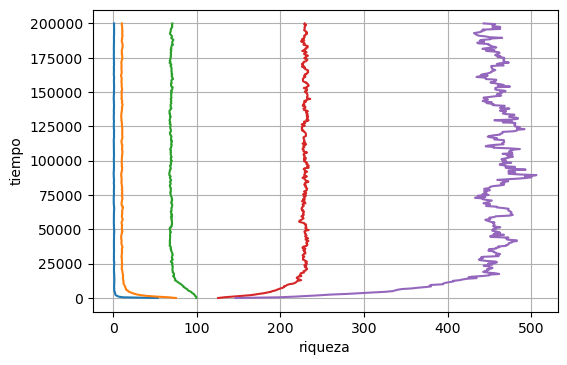

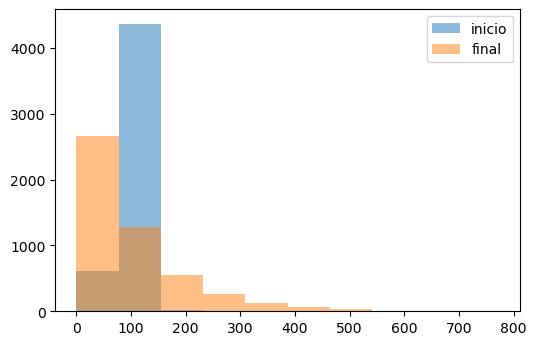

In [7]:
N  = 5000 # Tamaño de la población
MU = 100 # Dinero medio en la población

#dinerop = [random.uniform(MU,MU/7) for actor in range(N)]
dinerop = [random.gauss(mu=MU, sigma=MU/5) for actor in range(N)]

show1(dinerop)

### Parte I : Pregunta 1.a
    '[um] = Unidad monetaria.
    
    'Cuando el dinero medio de la poblacion baja de los 55-60[um], primer percentil que corresponde al 1% de la población, no obtiene riquesas en ciertas cantidad de transacciónes.
    
    'Cuando se mantiene en un nivel de 100-130[um], el primer,segundo y tercer percentil tienden a quedarse bajo la media, existiendo diferencias acumuladas de 300 unidades monetarias a partir del tercer percentil. Por otro lado el primer percentil logra aumentar su nivel de riquesa después de las 20000 transacciones a partir de las 115unidades monetarias.
    
    'Cuando se mantiene un nivel sobre las 400[um], el nivel de riquesa se dispersa un poco más.
    
    En conclusión con respecto al coeficiente de Gini, éste se mantine parcial ya que el comportamiento de su distribucion en la generacion de riquesa depende del valor proporcionado por la riquesa media, y que esta se estabiliza al término intermedio hacia una convergencia donde no se puede decidir la existencia de desigualdad o igualdad de riquesa.

### Parte I : Pregunta 1.b

    Modificación de función transacción, cual se cambia generación de valores aleatorios

### Simulación de datos con distribución de aleatoriedad  triangular

   t    Gini stdev   1%  10%  50%  90%  99%
------- ---- ----- ---- ---- ---- ---- ----
      0 0.11  19.8   54   75  100  126  146
 20,000 0.33  62.0    9   32   88  184  299
 40,000 0.34  62.5   10   32   88  183  300
 60,000 0.34  62.8   10   30   88  184  290
 80,000 0.34  64.5   10   32   87  185  305
100,000 0.34  63.6   10   31   87  184  298
120,000 0.34  63.7   10   33   87  183  312
140,000 0.33  62.8   10   33   87  182  299
160,000 0.34  62.6    9   32   87  183  300
180,000 0.34  64.3   10   32   87  185  309
200,000 0.34  64.3    9   31   87  186  311


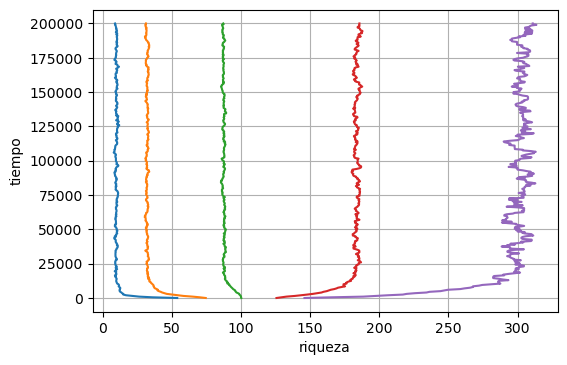

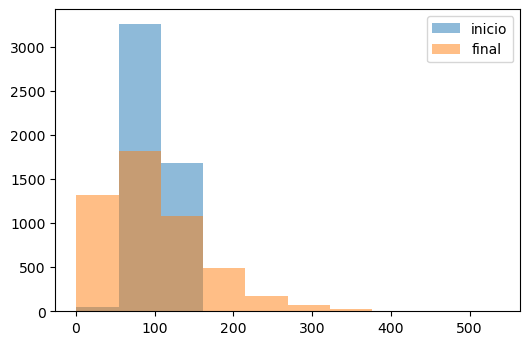

In [8]:
N  = 5000 # Tamaño de la población
MU = 100 # Dinero medio en la población

#dinerop = [random.uniform(MU,MU/7) for actor in range(N)]
dinerop = [random.gauss(mu=MU, sigma=MU/5) for actor in range(N)]

show2(dinerop)

### Parte I : Pregunta 1.c

    Discusión de resultados, donde otros factores influyen en la entrega de resultados

    Se puede desprender además que en la variación del SIGMA para generación de riquesa poblacional, el coeficiente de GINI inicialmente nos entrega una igualdad efectiva, ya que la generacion aleatoria de riquesa poblacional está dada por una distribución normal y cuanto más chico es el valor de concentración de la distribucion, esta se acota, por lo que los percentiles se juntan en función de la media salarial, para luego estabilizarse a la media cuando sobrepasa las 20000 transancciones.
    
    Por otro lado cuando se cambia la función de transacción, el coeficiente de GINI puede disminuir, ya que la funcion de distribucion a generar las transacciones, posee una concentración de valores distinta a la uniforme, permitiendo ser más equitativo en la repartición de dinero recaudado por un par de actores. 
    
    En relación a los datos podemos desprender que se acota la brecha de desigualdad, donde los percentiles más altos de la población disminuyen sus cifras, se acercándose a los primeros 3, los cuales aumentan.
    
    En relación a las series de tiempo, existe una similitud en tendecia reflejada en el comportamiento de un valor esperado, y que los percentiles intermedios están más cercanos junto con los extremos que estan más cerrados, hacia la tendencia central salarial.
    
    Con respecto al gráfico de desigualdad, al mostar en los datos con una convergencia no resolutiva en la primera simulación, podemos desprender que existe una disparidad además de una gran diferencia en comportamiento de los datos simulados. En comparación a la segunda simulación, logramos obtener un comportamiento casi homogeneo, donde éstos logran estar dentro de una distribución conocida con media asociada.
    

### Parte I : Pregunta 2

(array([2.8824e+04, 3.6001e+04, 1.6946e+04, 5.8090e+03, 1.7490e+03,
        4.8200e+02, 1.4000e+02, 3.6000e+01, 8.0000e+00, 5.0000e+00]),
 array([1.78581458e+03, 2.21226503e+05, 4.40667191e+05, 6.60107879e+05,
        8.79548567e+05, 1.09898925e+06, 1.31842994e+06, 1.53787063e+06,
        1.75731132e+06, 1.97675201e+06, 2.19619270e+06]),
 <BarContainer object of 10 artists>)

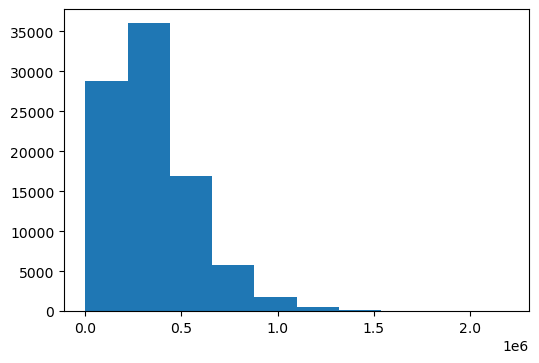

In [9]:
#Ejemplo simple de simular una población de 90000 actores, 
#con $350000 cada uno inicialmente y 6*150000 iteraciones:

data=[]
for pop in simula_TGR([350000] * 90000, 6*150000):
    data=pop
plt.hist(data)

##### P(A) = Actores con riqueza menor a 70000

In [10]:
p_a = 0
din_p_a=[]
for i in data:
    if i<70000:
        p_a+=1
        din_p_a.append(i)
print(f"P(A) = ",p_a/len(data))

P(A) =  0.042722222222222224


##### P(B) = Coeficiente de gini de la población sea mayor a 0.03 con 5000 transacciones.

(array([464., 491., 482., 495., 516., 482., 513., 521., 509., 528.]),
 array([0.        , 0.00344992, 0.00689984, 0.01034977, 0.01379969,
        0.01724961, 0.02069953, 0.02414946, 0.02759938, 0.0310493 ,
        0.03449922]),
 <BarContainer object of 10 artists>)

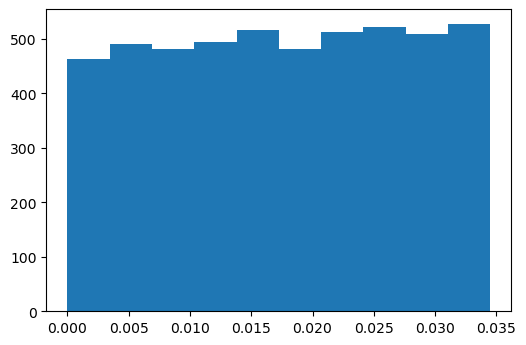

In [11]:
dat=[]
for pop in simula_TGR([350000] * 90000, 5000):
    dat.append(gini(pop))
plt.hist(dat)

In [12]:
el=0
for i in dat:
    if i>= 0.03:
        el+=1
print(f'P(B) = ',el/5000)

P(B) =  0.137


##### P(C) = Actores que se encuentren en el 2° percentil

In [13]:
se_percentil= len(data)*(2/5)

print(f"P(C) = ",se_percentil/len(data))

P(C) =  0.4


##### $P(A \cup B)$ = Actores con riqueza menor a 70000 o dentro del coeficiente de gini de 0.03 con 5000 transacciones

In [14]:
Pa_b = (el/5000)+(se_percentil/len(data))
print(f"P(A∪B) =",Pa_b)

P(A∪B) = 0.537


##### $P(A | C)$ =  Actores que se encuentren en el 2° percentil dado que su riqueza sea menor a 70000

$P(A | C) = P(A \cap C )/P(C) = P(A) $ Para sucesos A y C independientes.

In [15]:
print(f"P(A|C) = ", p_a/len(data))

P(A|C) =  0.042722222222222224


## Parte II: Distribuciones 

Busque un conjunto de datos disponible en un repositorio público, que contenga un conjunto de datos (al menos 1000 datos) de una variable aleatoria a valores reales. Utilice el set de datos para realizar las siguientes actividades:

Ejemplo de repositorio de datos climáticos: www.cr2.cl

#### 0. Indique la fuente de sus datos.

    - Fuente: https://data.oecd.org/agroutput/meat-consumption.htm

In [16]:
datos = pd.read_csv("DP_LIVE_03102021210904857.csv")

#### 1. (0,5 pts) Descripcion de datos:  describa sus datos estadísticamente, grafique histograma y distribución de probabilidad empírica. Mencione alguna característica particular de su set de datos. 

    Tomamos un dataset cual contempla la actividad del consumo de carne a nivel mundial, donde sus datos comprenden:

- Pais = Región cual comprende la medicion.
- Indicador = Medida del experimento.
- Sujeto = Tipo de consumo.
- Medida = Kg/por persona ó Toneladas.
- Frecuencia = índice de consumo.
- Tiempo = Año cual se hizo medida.
- Valor = registro según medida.
- Código bandera = código país.

    De estos datos consideramos a los paises de américa con un total de 1120 datos, donde consideramos como información comparativa la cantidad de consumo por persona por año, en un margen de 40 años. Este margen emplea los datos recopilados desde 1990 hasta contemplar sus proyecciones para 2029.

    Se escogió ese apartado del dataset, pues es una información más interesante de razonar, y facil de asociar con la vida diaria.

    En particular, el consumo por año registrado y por registrar, se asemeja al concepto de datos de tipo ambiental (vease ref 1), pues estos cuantifican la tendencia de consumo, que además se puede categorizar por el conjunto de paises seleccionados. Aunque si bién es entendible que una persona no consume carne solo a kilos por porción, se obtará por cuantificarlos por consumo en kilos (obviando los datos referidos en toneladas), de modo que esta variable se le considerará de tipo continua y no discreta, en base a las definiciones vistas en laboratorios anteriores (además, vease ref 2).

    Su concentración en relación a los datos históricos, nos indica que existe una gran cantidad de paises por año bajo el consumo de 5kg/cap, y que va en decremento a medida que su consumo aumenta. Después de ello existe un leve incremento casi sostenido sobre los 100 paises por años entre los [10,20]kg/cap. logrando balancear los datos hacia el alto consumo. Tal como se desplegaron anteriormente, pudo asociarse a una distribución conocida como la exponencial continua, cual mediante  la representación de los datos permitía una representación idónea como distribución a los datos obtenidos.

- ref 1: https://www.cepal.org/sites/default/files/courses/files/2018-01_1.4_aspectos_metodologicos_prod-estadistica_rayen-quiroga-cepal.pdf
- ref 2: https://www.tecnologias-informacion.com/tipos-estadisticos.html

In [17]:
def representacion(data):
    drop_data = data.drop(labels=["TIME"], axis=1,inplace=False)
    colums = drop_data.columns
    drp_data = np.array(drop_data)
    
    indx=[]
    for i in range(colums.shape[0]):
        indx.append(pd.to_datetime(colums[i]))
    
    paises=drop_data.index
    paises.name="Country"
    
    out = pd.DataFrame(data=drp_data,index =paises , columns=indx)
    
    return(out)

In [18]:
data = datos[(datos.LOCATION.isin(['ARG,''BRA', 'CHL','COL','PER','PRY','MEX','CAN','USA']))]
data.shape

(2240, 8)

In [19]:
data_a = pd.get_dummies(data, columns=['SUBJECT'])
data_b = data_a[data_a["MEASURE"]=="KG_CAP"]

In [20]:
data_c = data_b.drop(columns=['FREQUENCY','Flag Codes','INDICATOR'], axis=1)

In [21]:
data_c.head()

,LOCATION,MEASURE,TIME,Value,SUBJECT_BEEF,SUBJECT_PIG,SUBJECT_POULTRY,SUBJECT_SHEEP
160,CAN,KG_CAP,1990,25.002,1,0,0,0
161,CAN,KG_CAP,1991,24.456,1,0,0,0
162,CAN,KG_CAP,1992,23.830,1,0,0,0
163,CAN,KG_CAP,1993,22.805,1,0,0,0
164,CAN,KG_CAP,1994,23.226,1,0,0,0


Total de consumo =  1120


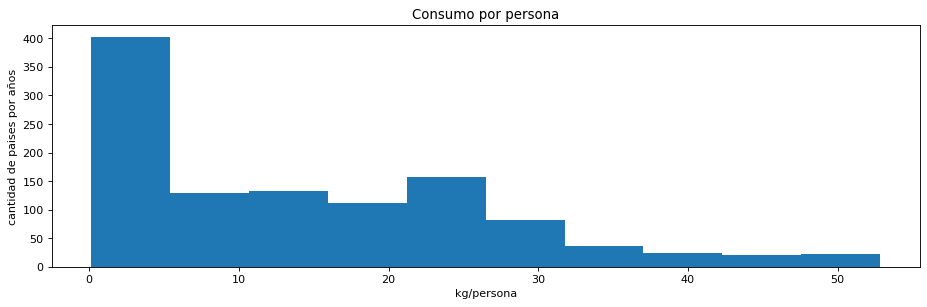

In [22]:
#data_a.drop('INDICATOR', axis=1, inplace=True)
fig, ax = plt.subplots(1, 1, figsize=(14, 4), dpi=80)
print(f'Total de consumo = ',data_c.shape[0])
ax.set_title("Consumo por persona")
ax.set(xlabel='kg/persona', ylabel='cantidad de paises por años')
ax.hist(data_c['Value'])
plt.show()

In [23]:
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

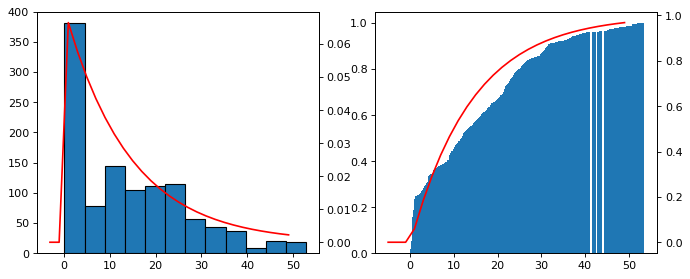

In [24]:
datos = data_c['Value']

binwidth = 4
args = stats.expon.fit(datos)
fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)

axs[0].hist(datos, edgecolor = 'black', bins = int(50/binwidth))
ax1 = axs[0].twinx()
vec = range(-5,50,2)
dvec0=[]


for i in vec:
    dvec0.append(stats.expon.pdf(x=i, loc=args[0], scale=args[1]))
    
ax1.plot(vec[1:],dvec0[1:],color='red')

x,cum_exp = ecdf(datos)
axs[1].bar(x+0.3,cum_exp)
## probabilidad teórica
ax2 = axs[1].twinx()

pvec0 = []
for i in vec:
    pvec0.append(stats.expon.cdf(x=i, loc=args[0], scale=args[1]))
ax2.plot(vec,pvec0,color='red')   
plt.show()

2. (1 punto) Seleccione aleatoriamente una cantidad N de sus datos y calcule 3 estadísticos muestrales, luego aumente la cantidad de datos seleccionado (N++), grafique los valores de los estadísticos muestrales en cada iteración ¿qué ocurre con los estadísticos muestrales a medida que aumenta N?. Investigue y responda en base a la ley de los grandes números.

In [95]:
import statistics
import math

from IPython.display import display, Math
 

In [97]:
n = int(len(datos)*3/5)

largo = list(range(1,5000))

mn = [] #extrae las medias
md = [] #extrae las medianas
std= [] #extrae las desviaciones estandar

for j in largo:
    dat = np.random.choice(list(datos),size=n,replace=True)
    mn.append(statistics.mean(dat))
    md.append(statistics.median(dat))
    std.append(statistics.stdev(dat))

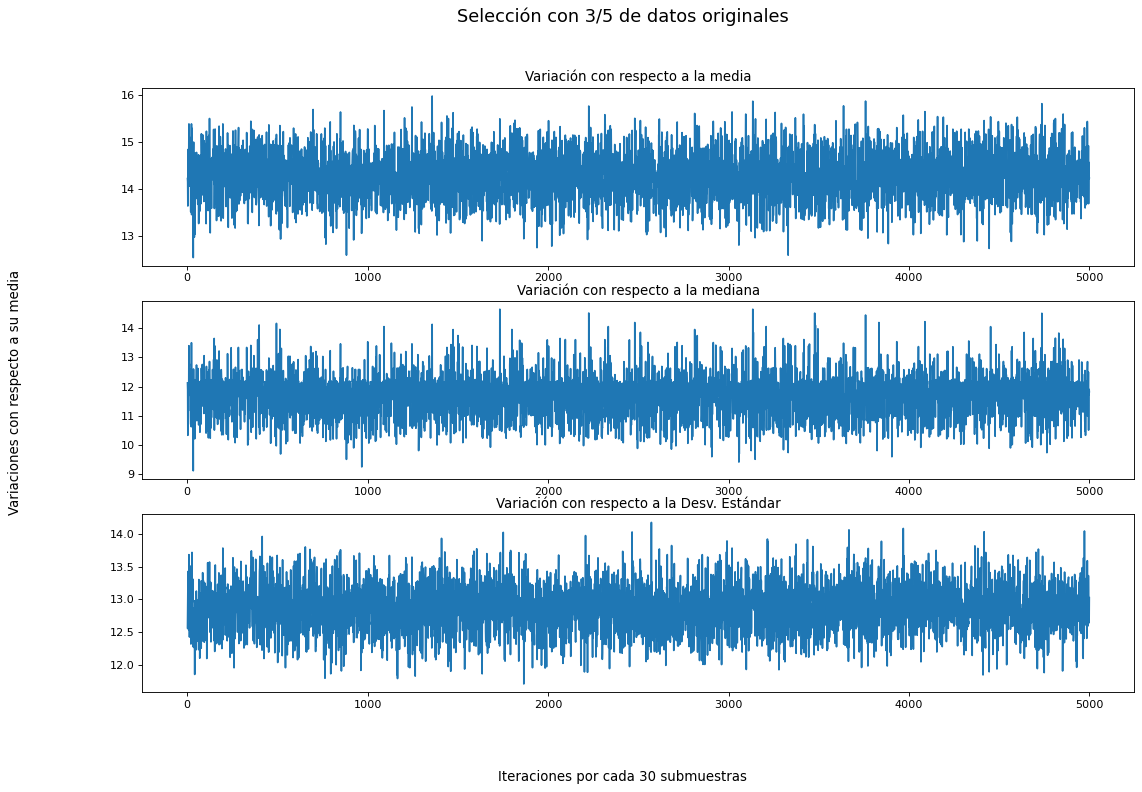

In [98]:
fig, ax = plt.subplots(3,1, figsize=(16, 10), dpi=80)
ax[0].set_title("Variación con respecto a la media")
ax[0].plot(largo,mn)

ax[1].set_title("Variación con respecto a la mediana")
ax[1].plot(largo,md)

ax[2].set_title("Variación con respecto a la Desv. Estándar")
ax[2].plot(largo,std)
fig.supylabel('Variaciones con respecto a su media')
fig.supxlabel('Iteraciones por cada 30 submuestras')
fig.suptitle('Selección con 3/5 de datos originales', fontsize=16)
plt.show()

Selección de N++ de datos con respecto a los originales y se aplica cálculo de:

* Media
* Mediana
* Desviación Estándar

In [100]:
n = int(len(datos)*1/30)
n_parte = int(len(datos)*29/30)
lis = list(range(0,n_parte))

mn = [] #extrae las medias
md = [] #extrae las medianas
std = [] #extrae las desviaciones estandar

for j in lis:
    dat = np.random.choice(list(datos),size=n+j,replace=True)
    mn.append(statistics.mean(dat))
    md.append(statistics.median(dat))
    std.append(statistics.stdev(dat))

Media de los datos:  14.27977767857143
Mediana de los datos:  11.718
Desviacion estandar de los datos:  12.883331188502376


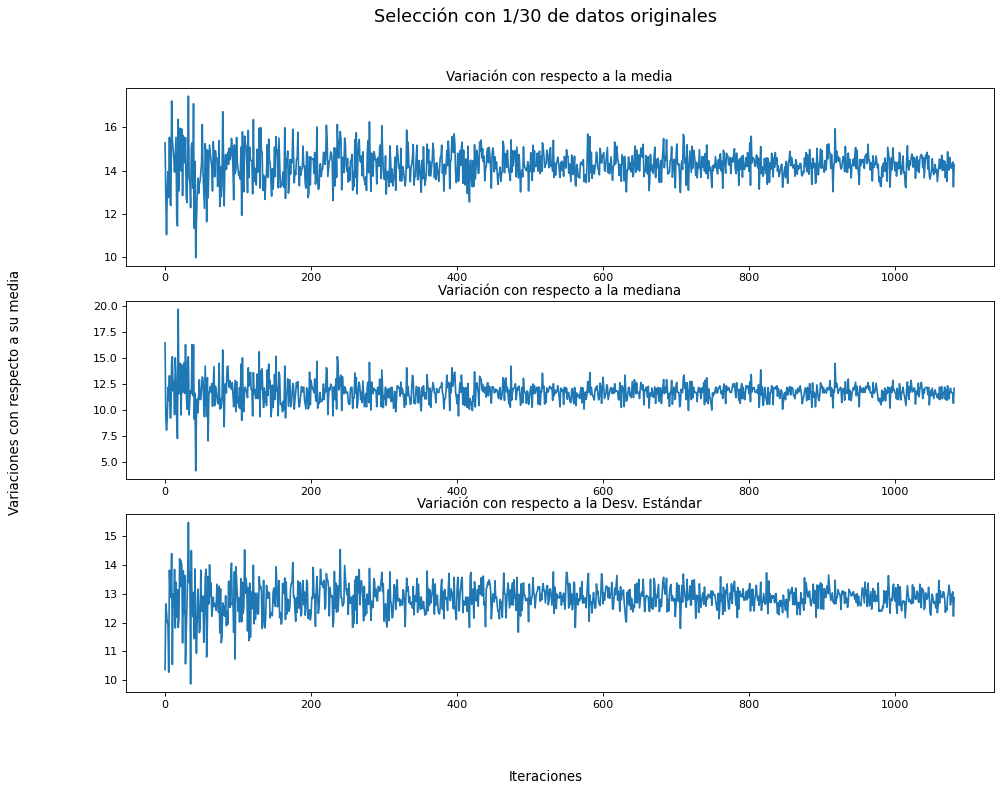

In [101]:
print("Media de los datos: ",statistics.mean(datos))
print("Mediana de los datos: ", statistics.median(datos))
print("Desviacion estandar de los datos: ", statistics.stdev(datos))

fig, ax = plt.subplots(3,1, figsize=(14, 10), dpi=80)
ax[0].set_title("Variación con respecto a la media")
ax[0].plot(lis,mn)

ax[1].set_title("Variación con respecto a la mediana")
ax[1].plot(lis,md)

ax[2].set_title("Variación con respecto a la Desv. Estándar")
ax[2].plot(lis,std)
fig.supylabel('Variaciones con respecto a su media')
fig.supxlabel('Iteraciones')
fig.suptitle('Selección con 1/30 de datos originales', fontsize=16)
plt.show()

"" La ley de los grandes números es un teorema fundamental de la teoría de la probabilidad que indica que si repetimos muchas veces (tendiendo al infinito) un mismo experimento, la frecuencia de que suceda un cierto evento tiende a ser una constante. ""

Lo que se puede concluir es que: a medida que la cantidad de experimentos en la relación de sus datos crezcan, se logra convergencia hacia los estadígrafos representativos de los datos simulados.

3. (1 punto) Divida su set de datos en distintos grupos (aleatoriamente) y calcule los estadísticos muestrales de cada grupo y grafique el histograma resultante. Por ejemplo: para el caso de la media, debe calcular la media para cada grupo y luego graficar el histograma del conjunto de medias. ¿los estadísticos muestrales cumplen el Teorema del Límite Central? Justifique su respuesta.

In [34]:
def estadisticosMuestrales(data, largo, tamaño):
    mn = [] #extrae las medias
    md = [] #extrae las medianas
    std= [] #extrae las desviaciones estandar

    for i in range(largo):
        dat = np.random.choice(list(data),size=tamaño,replace=True)
        mn.append(statistics.mean(dat))
        md.append(statistics.median(dat))
        std.append(statistics.stdev(dat))
    
    return mn, md, std

In [90]:
g1 = random.sample(list(datos), k=500)
g2 = random.sample(list(datos), k=500)
g3 = random.sample(list(datos), k=500)

In [91]:
x1, y1, z1 = estadisticosMuestrales(g1, 500, int(len(g1)*3/5))
x2, y2, z2 = estadisticosMuestrales(g2, 500, int(len(g1)*3/5))
x3, y3, z3 = estadisticosMuestrales(g3, 500, int(len(g1)*3/5))

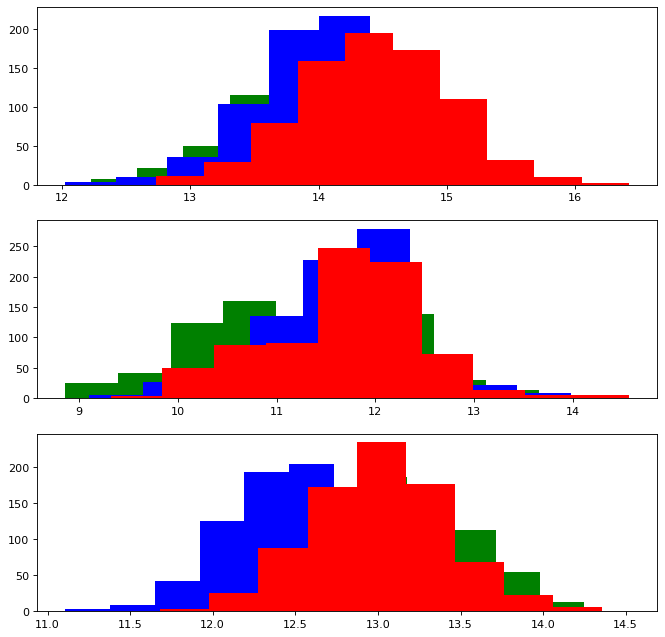

In [94]:
fig, axs = plt.subplots(3, 1,figsize=(10, 10), dpi=80)
axs[0].hist(x1,color="green")
axs[0].hist(x2,color="blue")
axs[0].hist(x3,color="red")
axs[1].hist(y1,color="green")
axs[1].hist(y2,color="blue")
axs[1].hist(y3,color="red")
axs[2].hist(z1,color="green")
axs[2].hist(z2,color="blue")
axs[2].hist(z3,color="red")
plt.show()

Teniendo un total de 9 estadísticos muestrales, sobre tres muestras:

- Verde: Media
- Azul: Mediana
- Rojo: Desviación estandar

En general, se puede apreciar que sus representaciones gráficas siempre se ajustan a una forma similar a una campana de gauss. Aunque este efecto se aprecia en 3 ejemplos diferentes, arrojar mas ejemplos genera resultados similares, apreciandose una tendencia por adquirir esta forma usando una grán cantidad de datos (500 por muestra), por lo que se puede afirmar que se cumple el teorema de límite central. Incluso, si se varia la muestra, aumentandola para una mayor exactitud, esta tendencia de formar la campana se mantiene.

En particular por los estadísticos muestrales, la media puede mostrar resultados más dispersos y puede aparentar si no se hacen muchas pruebas, que no nesesariamente establezca una tendencia de gauss, pero al cotejar al menos 3 conjuntos, se empieza a establecer un patrón de gauss. Sus datos a diferencia de los demás parecen agruparse mas agresivamente al centro que los demás.

Por parte de la mediana, esta se diferencia de las otras distribuciones al tener casi por norma sus datos concentrados a la izquierda de la campana conformada, teniendo algunos saltos considerables en la representación de las barras de los historiagramas.

La desvición estandar es el estadístico muestral en donde más se aprecia la tendencia a formar la campana de gauss, intentando preservar una simetria por el centro de su historiagrama asociado.

4. (0,5 pts) Defina una hipótesis sobre la distribución que siguen sus datos, utilice el test Kolmogorov-Smirnov ¿Puede rechazar la hipótesis? (usando un 95% de confianza). Comente sus resultados.

In [39]:
from scipy.stats import kstest

In [102]:
stats.kstest(datos, 'expon')

KstestResult(statistic=0.6775730066153474, pvalue=0.0)

In [103]:
stats.kstest(datos, 'expon', args)

KstestResult(statistic=0.17023514679078036, pvalue=7.590014343762616e-29)

In [104]:
datos2= stats.expon.rvs(loc=args[0], scale=args[1] ,size=70)
stats.kstest(datos, datos2)

KstestResult(statistic=0.12232142857142857, pvalue=0.25874872596663023)

Desarrollaremos una Hipótesis nula $H_{0}$ en decir: ¿nuestros datos provienen de una distribución exponencial?

Para ello, se desarrolla el test de Kolmogorov-Smirnov para calcular su bondad y su valor de decisión además de que tan cercanos están los datos con respecto a la distribución testeada, que según los primeros resultados podemos desprender que se rechazarían nuestras hipótesis, porque no se acercan a nuestro mínimo de confianza para la aceptación. 

Aún así no podemos rechazar la hipótesis, debido que nuestra distribución afecta directamente a los valores del extremo izquierdo, cual concentración decrece a medida aumentan los consumos por persona al resultado que se espera del test. Esto se debe a una de las limitaciones del test de Kolmogorov, [$\href{https://www.itl.nist.gov/div898/handbook/eda/section3/eda35g.htm}{ENGINEERING STADISTICS}$] y que para dichos casos es necesario su determinación mediante simulaciones.

Que por último al no tener desición en rechazar el test de hipótesis, logramos encontrar con algun conjunto de datos simulados que permitan decir que nuestros datos se comprenden dentro de una distribución exponencial.

5. (1 punto) Calcule la incerteza de sus estadísticos muestrales utilizando bootstrap. Interprete sus resultados. 

In [105]:
n = int(len(datos)*3/5)

media = statistics.mean(datos)
mediana = statistics.median(datos)
des_sta = statistics.stdev(datos)

largo = list(range(1,200))

mn = [] #extrae las medias
md = [] #extrae las medianas
std= [] #extrae las desviaciones estandar
var_m = [] #extrae las varianzas de las medianas
var_md = [] #extrae las varianzas de las medias
var_std = [] #extrae las varianzas de las desviaciones estandar

for j in largo:
    mn=[]
    md=[]
    std=[]
    for i in range(30):
        dat = np.random.choice(list(datos),size=n,replace=True)
        mn.append(statistics.mean(dat))
        md.append(statistics.median(dat))
        std.append(statistics.stdev(dat))

    var_m.append(statistics.variance(mn))
    var_md.append(statistics.variance(md))
    var_std.append(statistics.variance(std))

In [106]:
ran = 1.96*math.sqrt(var_m[len(var_m)-1])
print("La convergenia en razón a su media es: ")
display(Math('%0.2f \pm %0.2f' % (media, ran )))

ran = 1.96*math.sqrt(var_md[len(var_md)-1])
print("La convergenia en razón a su Mediana es:")
display(Math('%0.2f \pm %0.2f' % (mediana, ran )))

ran = 1.96*math.sqrt(var_std[len(var_std)-1])
print("La convergenia en razón a su Desv. Estandar es:")
display(Math('%0.2f \pm %0.2f' % (des_sta, ran )))

La convergenia en razón a su media es: 


<IPython.core.display.Math object>

La convergenia en razón a su Mediana es:


<IPython.core.display.Math object>

La convergenia en razón a su Desv. Estandar es:


<IPython.core.display.Math object>

En relación a los resultados obtenidos, podemos detallar que sus intervalos de confianza contemplan cifras muy aproximadas a variaciones decimales, por lo que estas variaciones en relacion a sus errores medios cuadráticos, nos permite decir que conservan una estricta relación de sus datos con respecto a sus estadígrafos, sin haber bruscos desbalances en sus convergentes valores dados.

### Referencias útiles para la parte II: 



[1] **Ley de los grandes números:**  https://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter4_TheGreatestTheoremNeverTold/Ch4_LawOfLargeNumbers_PyMC3.ipynb


[2] Ross, https://drive.google.com/file/d/1tenWSvfAU2336m-km4vRMorKmDIQRKme/view?usp=sharing

## Parte III: Conclusiones


1. (0,8 pts) Presente las conclusiones de su trabajo. 

    Para los cálculos probabilísticos es de gran importancia como interpretar datos a base de muestras, por ello fue importante además de interesante el como poder relacionar a nivel de distribución los índices de desigualdad en comparación de sus percentiles. Ello nos permitió saber como sectores de la población pueden ser afectados por medidas distintivas para la distribución y asignación de la riqueza.

    Por cuanto a las simulaciones donde necesitamos acomodar un dataset a nivel distributivo, se comprendió que en la variabilidad de los datos juega un rol importante en los estadígrafos además de como se distribuyen, ya que éstos nos permiten saber y determinar bajo que restricciones estos datos pueden generarse o pueden ser comparados, entendiendo que en la complejidad de las matemáticas se busca la verdad en el comportamiento natural de los sucesos. Si bien, al momento de simular los datos que permitan dar aproximaciones certeras hacia el conjunto muestral de datos, resulta dificil como validar analíticamente, debido que en la comprensión, algunos test funcionan bajo ciertas restricciones, lo que no implica que se denieguen las hipótesis. Por último, la calidad de los datos no solo debe ser validada por algunos test que verifiquen de donde provengan, también se debe entender que los estadígrafos que definen los datos y de cierta forma la distribución, necesariamente no deben contener errores hacia sus convergencias. Por ello, se verifica y se refinan esta misma calidad y precisión de datos en términos comparativos, usando la técnica de remuestreo, permitiendo además ganar mayor información con lo poco que se tiene para elevar conclusiones certeras.


2. (0,2 pts) Además reflexione respecto a qué significa que los datos sean **independientes e identicamente distribuidos** y por qué se debe cumplir esta condición en los grupos seleccionados aleatoriamente en las preguntas 2 y 3 de la parte II (puede reflexionar en torno a qué pasaría si no lo fueran) 


Que los datos sean independientes e idénticamente distribuidos, quiere decir que en nuestra muestra las variables no se relacionan entre sí, además de que cada  variable aleatoria posee la misma distribución de probabilidad. En el caso de el dataset utilizado, los datos no dependen de otros, es decir que el consumo anual per cápita por países no son dependientes entre sí.

Para aplicar la Ley de los grandes números y el Teorema del límite central (TLC), las muestras deben corresponder a una secuencia de variables aleatorias independientes e idénticamente distribuida. Ya que, si no lo fueran no se podría concluir que los estadígrafos muestrales cumplan con la ley de los grandes números y el TLC respectivamente.

La ley de los grándes números implica que se consigan mayores muestras para acercarse a la tendencia deseada o convergencia, pero este mismo se perderia en una gráfica aún más caotica que la representada, dificultando que estas gráficas tiendan a ordenarse.

Una forma de probar esto, es si en los estadísticos muestrales (ejercicio 3), que agruparon 500 datos cada uno, estos 500 fueran datos seguidos unos de otros, generando igualmente una gráfica pero cuya propagación no siga la tendencia de gauss como se le busca, si no que una representación más caótica.